### Student Information
Name: Zhang Zhuqing

Student ID: t14902204

GitHub ID: shinshin512

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Data Preparation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read data file and store it in df
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

### 1.1. Data Exploration

In [3]:
# observe data
df.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [4]:
df.shape

(847, 16)

In [5]:
df.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

### 1.2. Data Filtering

1. Essential columns
- text – the raw text of the post/comment. This is your main input for text mining.
- label – the target variable you want to predict (1.0, 0.0, -1.0).

2. Optional but helpful columns - **future enhancements**
- title – sometimes adds extra context to the post. You can combine it with text.
- subjectivity & polarity – precomputed sentiment features; can boost model performance without extra text processing.
- upvotes, downvotes, upvote_ratio – may give context about how others perceive the post.
- type – comment vs post; occasionally useful for patterns in sentiment.

3. Columns you can safely ignore
- datetime (unless doing temporal analysis)
- post_id, url (unique identifiers, not predictive)
- subreddit, author (can be useful if you want extra features, but optional)
- entities (only if you want named-entity info; not strictly necessary for basic sentiment prediction)

In [6]:
# filter to only essential columns
df = df[['text', 'label']]

### 1.3. Data Cleaning

In [7]:
# check for null
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
# check for duplicate
sum(df.duplicated())

23

In [9]:
# remove all duplicates, keeping only the uniques
df.drop_duplicates(keep=False, inplace=True)

### 1.4. Split train and test df

In [10]:
# split into train and test df
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# reindex since the train_test_split randomly choose the data, causing unorganized index
df_train.reset_index(inplace=True, drop=True)

In [11]:
# observe the training data
df_train

,text,label
0,I’m still down 24% from recent highs. I wonder...,-1.0
1,Art of the Deal,0.0
2,r/CanadianInvestor would a better place to ask...,1.0
3,Xi is leader for life of a totalitarian regime...,-1.0
4,"Selling my Silver, pity it's just a miniscule ...",-1.0
...,...,...
645,"This is a massive acquisition for them, adding...",1.0
646,Lump sum tends to beat DCA but DCA minimizes r...,1.0
647,The Orange Idiot poked the Dragon and now is a...,-1.0
648,"ok, thanks",0.0


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

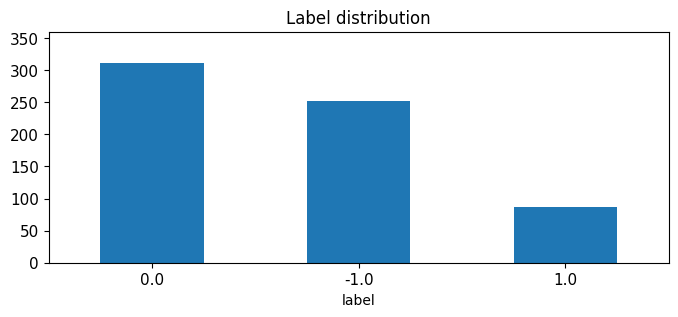

In [12]:
import matplotlib.pyplot as plt

# observe the distribution of label column
df_train.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 360],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

## 2. Data Preprocessing

### 2.1. Feature subset selection


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# only training data
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_train.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (np.int32(0), np.int32(3082))	1
  (np.int32(0), np.int32(1036))	1
  (np.int32(0), np.int32(72))	1
  (np.int32(0), np.int32(1365))	1
  (np.int32(0), np.int32(2640))	1
  (np.int32(0), np.int32(1584))	1
  (np.int32(0), np.int32(3638))	1
  (np.int32(0), np.int32(3595))	1
  (np.int32(0), np.int32(586))	1
  (np.int32(0), np.int32(466))	1
  (np.int32(0), np.int32(1336))	1
  (np.int32(0), np.int32(3268))	1
  (np.int32(0), np.int32(1405))	1


Some examples of what each feature is based on their index in the vector:

In [14]:
count_vect.get_feature_names_out()[443]

'betrayed'

In [15]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [16]:
# convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

#### Heatmap of Words 

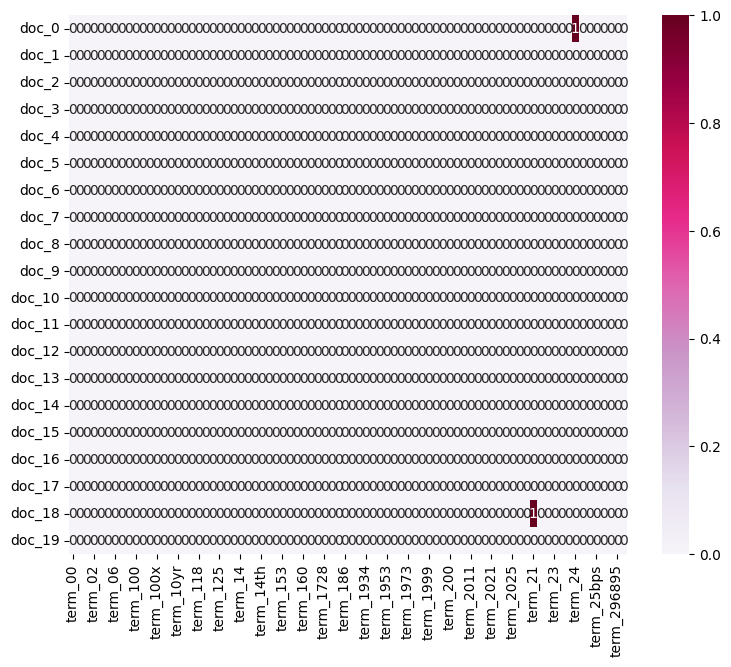

In [21]:
# first 20 features only, observe only first 80 words
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:80]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = df_counts[0:20, 0:80].toarray() #df_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

### 2.2. Attribute Transformation / Aggregation

In [27]:
import numpy as np

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [28]:
#sum of first term: 00
term_frequencies[0]

np.int64(4)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_4554/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


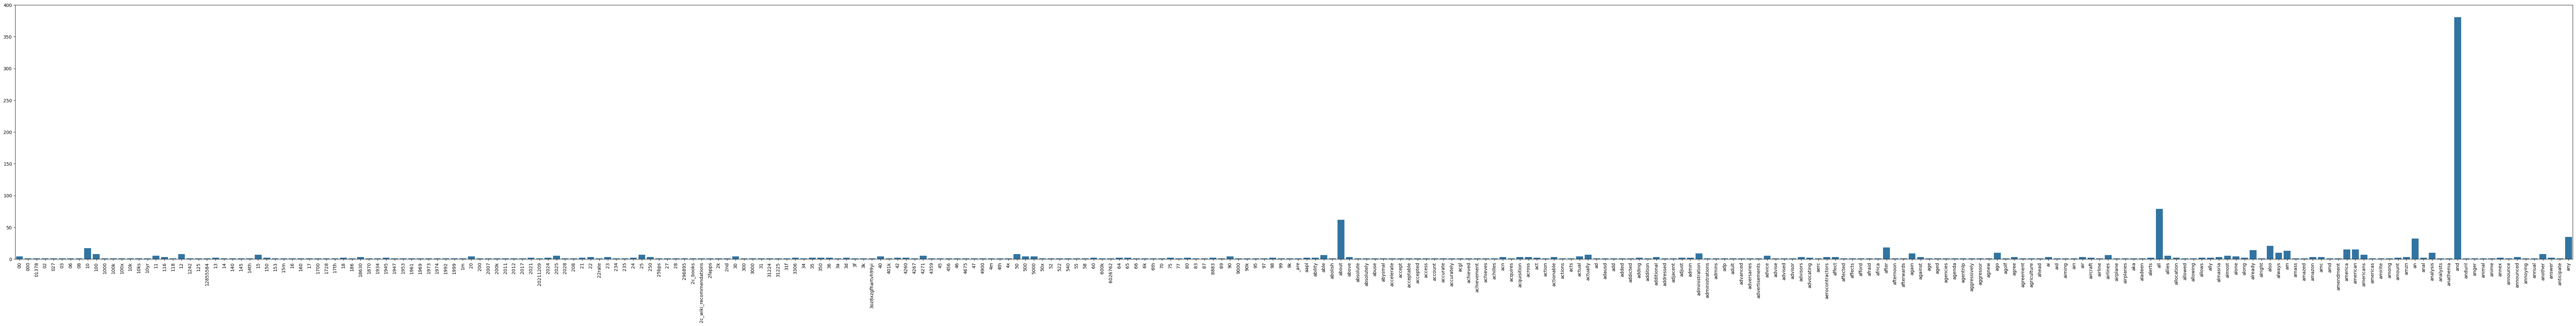

In [29]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

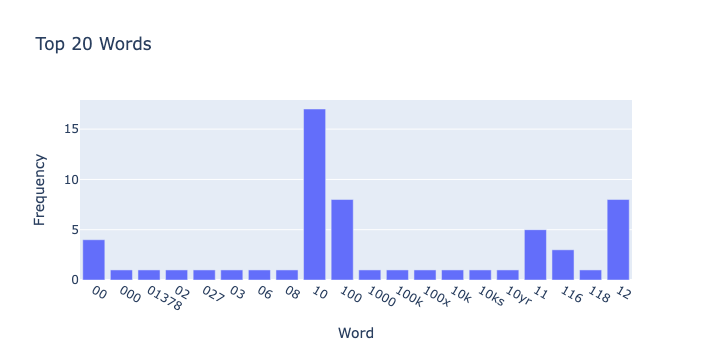

In [30]:
import plotly.express as px

words = count_vect.get_feature_names_out()[:20]
counts = term_frequencies[:20]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 20 Words')
fig.show()


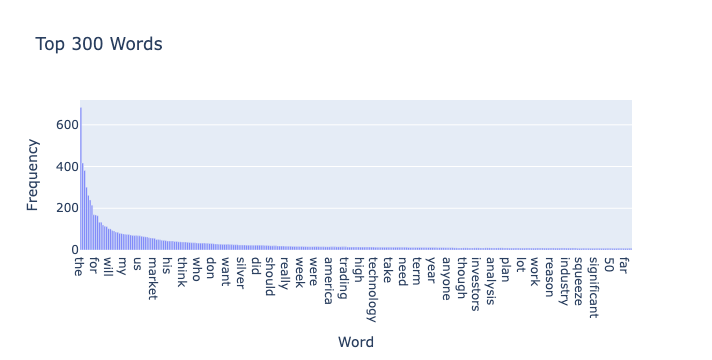

In [31]:
# Answer here

# observe only top 300 frequently used words
import plotly.express as px

idx = term_frequencies.argsort()[::-1][:300]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 300 Words')

fig.show()

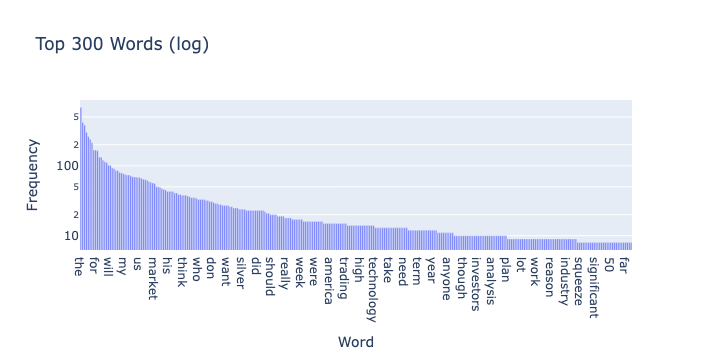

In [33]:
# Answer here

import plotly.express as px

idx = term_frequencies.argsort()[::-1][:300]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 300 Words (log)')

fig.update_yaxes(type="log")  

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here